In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# Which line lost business most due to yellow cab?

In [221]:
for i in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
    df = pd.read_csv('csv/'+i+'.csv')
    print i,'\n',df.groupby('line').sum().sort(columns=['count'],ascending=False)['count'][:5]

jan 
line
C    7459
1    7338
E    6547
6    6464
R    6334
Name: count, dtype: int64
feb 
line
1    8716
C    8063
6    6803
E    6646
R    6434
Name: count, dtype: int64
mar 
line
1    9252
C    8833
E    7368
F    7131
R    7064
Name: count, dtype: int64
apr 
line
1    8872
C    8448
E    6989
6    6938
R    6695
Name: count, dtype: int64
may 
line
C    8597
1    8480
E    7089
F    6932
R    6911
Name: count, dtype: int64
jun 
line
C    8859
1    8285
E    6941
R    6427
F    6340
Name: count, dtype: int64
jul 
line
1    9196
C    8941
6    8085
R    7548
F    7103
Name: count, dtype: int64
aug 
line
C    8877
1    8672
R    7568
E    7186
6    6882
Name: count, dtype: int64
sep 
line
1    8613
C    8345
6    7653
E    6759
F    6659
Name: count, dtype: int64
oct 
line
1    8965
C    8257
E    6914
R    6742
F    6540
Name: count, dtype: int64
nov 
line
1    8155
C    7811
F    7030
R    6741
E    6383
Name: count, dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


dec 
line
F    8448
1    8106
C    7723
M    7552
R    7248
Name: count, dtype: int64


In [603]:
line={}

In [601]:
lines=set(df.line)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


jan 
line
C    7459
1    7338
E    6547
6    6464
R    6334
Name: count, dtype: int64
feb 
line
1    8716
C    8063
6    6803
E    6646
R    6434
Name: count, dtype: int64
mar 
line
1    9252
C    8833
E    7368
F    7131
R    7064
Name: count, dtype: int64
apr 
line
1    8872
C    8448
E    6989
6    6938
R    6695
Name: count, dtype: int64
may 
line
C    8597
1    8480
E    7089
F    6932
R    6911
Name: count, dtype: int64
jun 
line
C    8859
1    8285
E    6941
R    6427
F    6340
Name: count, dtype: int64


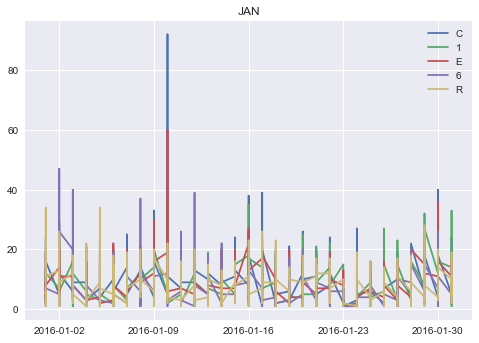

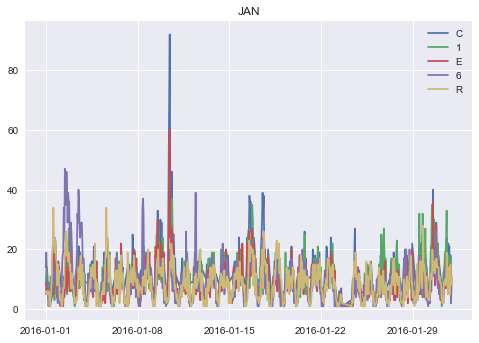

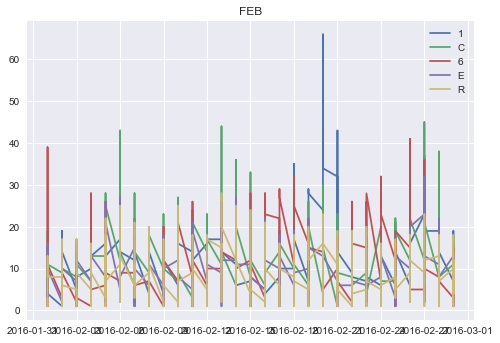

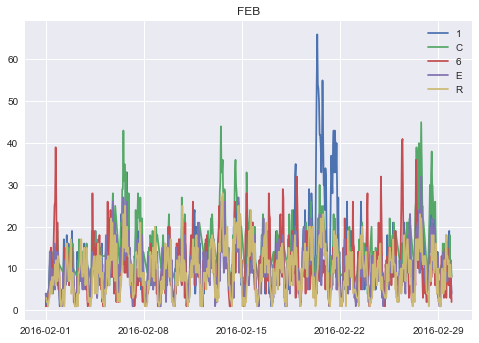

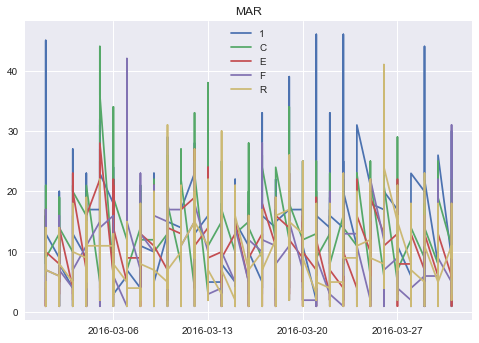

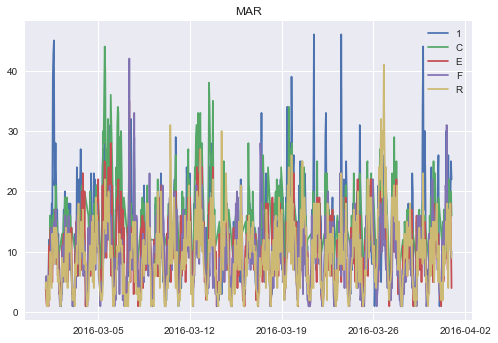

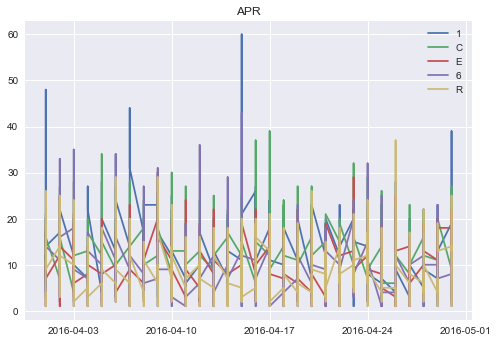

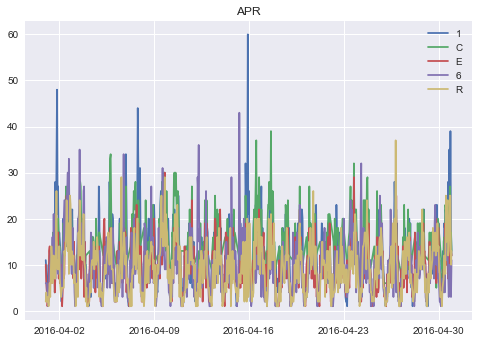

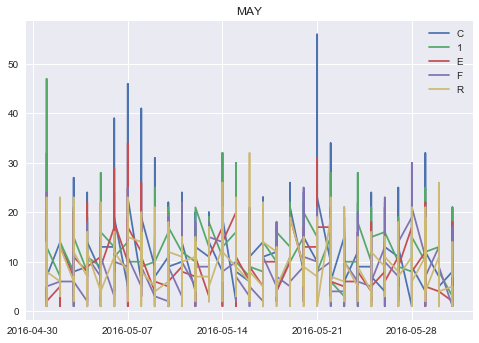

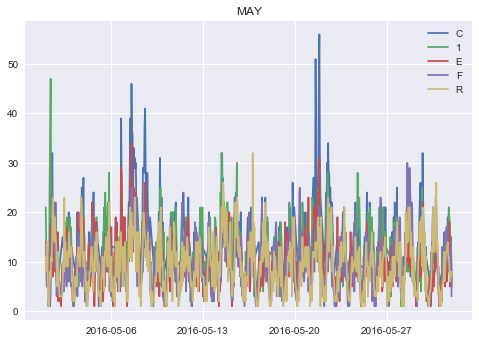

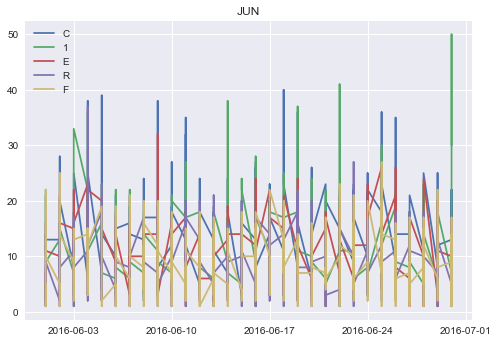

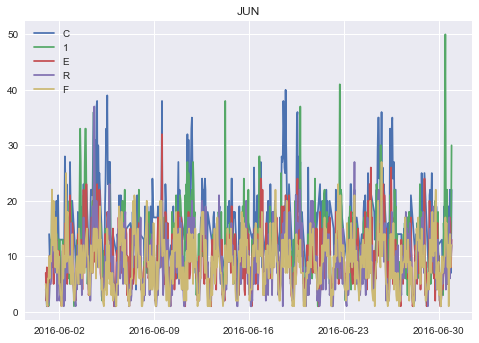

In [50]:
mon=['jan','feb','mar','apr','may','jun']
for i in mon:
    df = pd.read_csv('csv/'+i+'.csv')
    del df['Unnamed: 0']
    df.hour = map(lambda x: '0'+str(x) if x<10 else str(x),df.hour)
    df.day = map(lambda x: '0'+str(x) if x<10 else str(x),df.day)
    df.month = map(lambda x: '0'+str(x) if x<10 else str(x),df.month)
    df['time']=map(lambda x,y,z: dt.datetime.strptime('2016'+x+y+z,'%Y%m%d%H'), 
                    df.month,df.day,df.hour)
    df['date']=map(lambda x,y: dt.datetime.strptime('2016'+x+y,'%Y%m%d').date(),
                   df.month,df.day)
    df = df.sort(columns=['time'])
    print i,'\n',df.groupby('line').sum().sort(columns=['count'],ascending=False)['count'][:5]
    line_of_month = df.groupby('line').sum().sort(columns=['count'],ascending=False).index[:5]
    plt.figure()
    for j in line_of_month:
        plt.plot(df[df['line']==j]['date'],df[df['line']==j]['count'],label=j)
        plt.title(i.upper())
        plt.legend()
    plt.figure()
    for j in line_of_month:
        plt.plot(df[df['line']==j]['time'],df[df['line']==j]['count'],label=j)
        plt.title(i.upper())
        plt.legend()

In [624]:
for i in ['jan']:
    df = pd.read_csv('csv/'+i+'.csv')
    del df['Unnamed: 0']
    df.hour = map(lambda x: '0'+str(x) if x<10 else str(x),df.hour)
    df.day = map(lambda x: '0'+str(x) if x<10 else str(x),df.day)
    df.month = map(lambda x: '0'+str(x) if x<10 else str(x),df.month)
    df['time']=map(lambda x,y,z: dt.datetime.strptime('2016'+x+y+z,'%Y%m%d%H'), 
                    df.month,df.day,df.hour)
    df['date']=map(lambda x,y: dt.datetime.strptime('2016'+x+y,'%Y%m%d').date(),
                   df.month,df.day)
    df = df.sort(columns=['time'])
    for j in lines:
        if (j in df.line.values)== False:
            continue
        line[j] = df[df['line']==j]
    agg_date= pd.DataFrame(df.groupby('date').sum()['count'])
    agg_time= pd.DataFrame(df.groupby('time').sum()['count'])
    agg_day= pd.DataFrame(df.groupby('day_of_week').sum()['count'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [643]:
#line_of_month = ['C','1','E','6','R']
mon=['jan','feb','mar','apr','may','jun']
for i in mon[1:]:
    df = pd.read_csv('csv/'+i+'.csv')
    del df['Unnamed: 0']
    df.hour = map(lambda x: '0'+str(x) if x<10 else str(x),df.hour)
    df.day = map(lambda x: '0'+str(x) if x<10 else str(x),df.day)
    df.month = map(lambda x: '0'+str(x) if x<10 else str(x),df.month)
    df['time']=map(lambda x,y,z: dt.datetime.strptime('2016'+x+y+z,'%Y%m%d%H'), 
                    df.month,df.day,df.hour)
    df['date']=map(lambda x,y: dt.datetime.strptime('2016'+x+y,'%Y%m%d').date(),
                   df.month,df.day)
    df = df.sort(columns=['time'])
    #print i,'\n',df.groupby('line').sum().sort(columns=['count'],ascending=False)['count'][:3]
    for j in lines:
        if (j in df.line.values)== False:
            continue
        if j in line.keys():
            line[j] = pd.concat([line[j],df[df['line']==j]])
        else:
            line[j] = df[df['line']==j]
    agg_date= pd.concat([agg_date,pd.DataFrame(df.groupby('date').sum()['count'])])
    agg_time = pd.concat([agg_time,pd.DataFrame(df.groupby('time').sum()['count'])])
    agg_day = pd.concat([agg_day,pd.DataFrame(df.groupby('day_of_week').sum()['count'])],axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [644]:
#line_of_month = ['C','1','E','6','R']
mon=['jul','aug','sep','oct','nov','dec']
for i in mon:
    df = pd.read_csv('csv/'+i+'.csv')
    del df['Unnamed: 0']
    df.hour = map(lambda x: '0'+str(x) if x<10 else str(x),df.hour)
    df.day = map(lambda x: '0'+str(x) if x<10 else str(x),df.day)
    df.month = map(lambda x: '0'+str(x) if x<10 else str(x),df.month)
    df['time']=map(lambda x,y,z: dt.datetime.strptime('2015'+x+y+z,'%Y%m%d%H'), 
                    df.month,df.day,df.hour)
    df['date']=map(lambda x,y: dt.datetime.strptime('2015'+x+y,'%Y%m%d').date(),
                   df.month,df.day)
    df = df.sort(columns=['time'])
    #print i,'\n',df.groupby('line').sum().sort(columns=['count'],ascending=False)['count'][:3]
    for j in lines:
        if (j in df.line.values)== False:
            continue
        if j in line.keys():
            line[j] = pd.concat([line[j],df[df['line']==j]])
        else:
            line[j] = df[df['line']==j]
    agg_date= pd.concat([agg_date,pd.DataFrame(df.groupby('date').sum()['count'])])
    agg_time = pd.concat([agg_time,pd.DataFrame(df.groupby('time').sum()['count'])])
    agg_day = pd.concat([agg_day,pd.DataFrame(df.groupby('day_of_week').sum()['count'])],axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [645]:
print line['C'].count().sum()
print line['1'].count().sum()

52624
69536


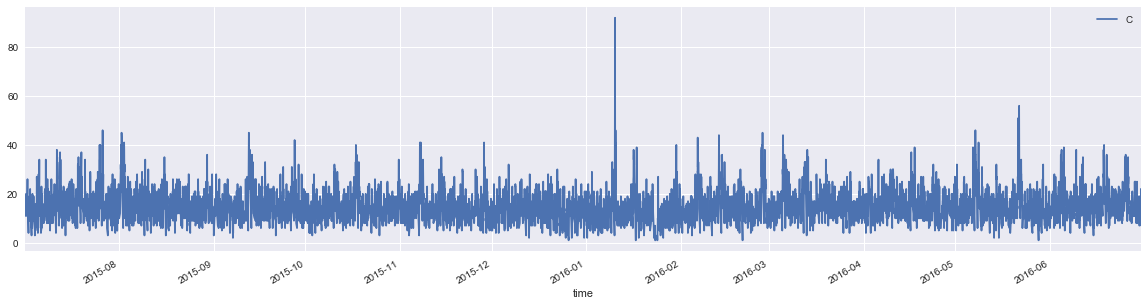

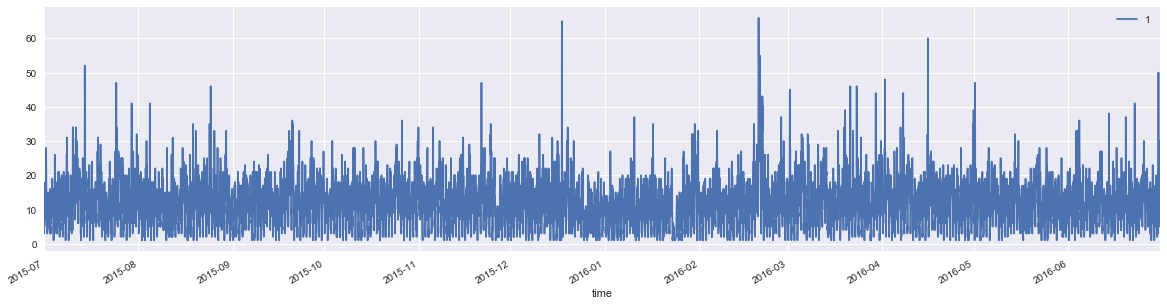

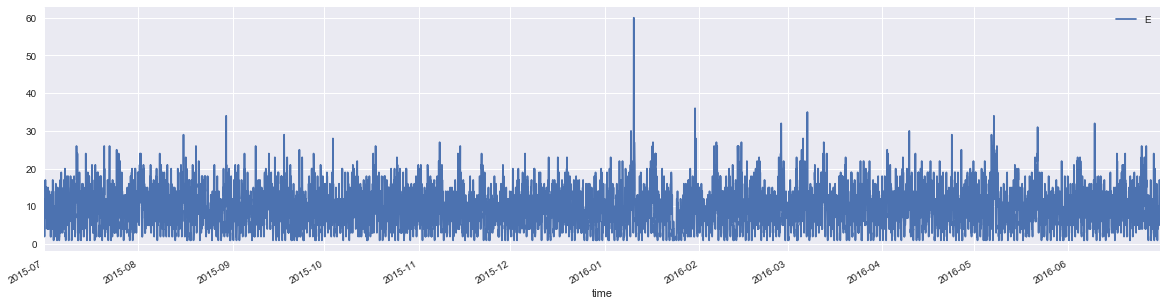

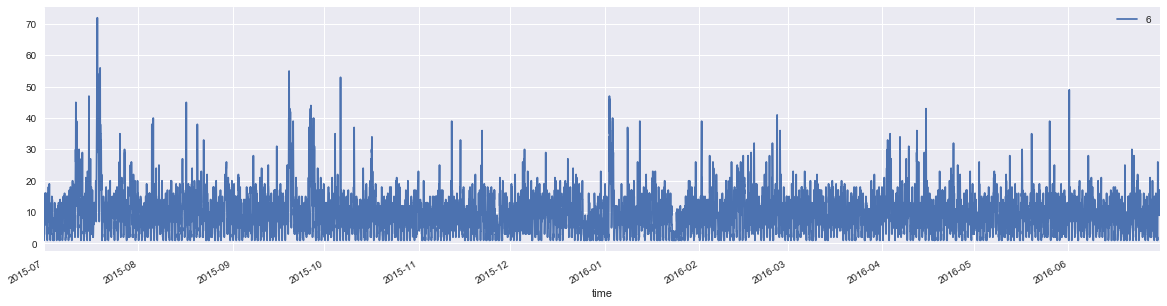

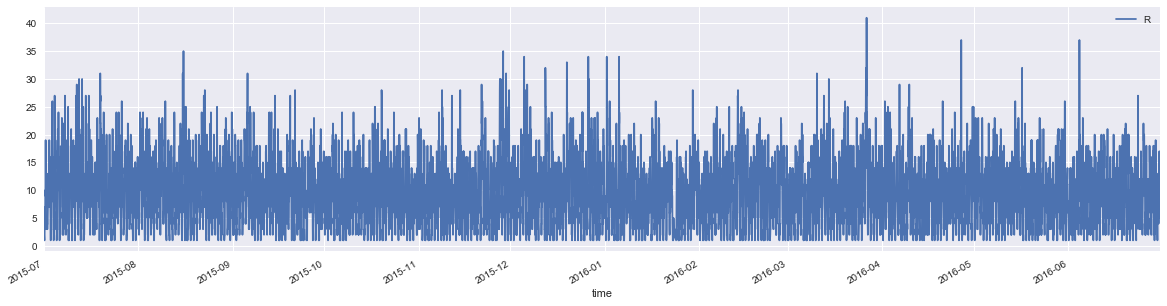

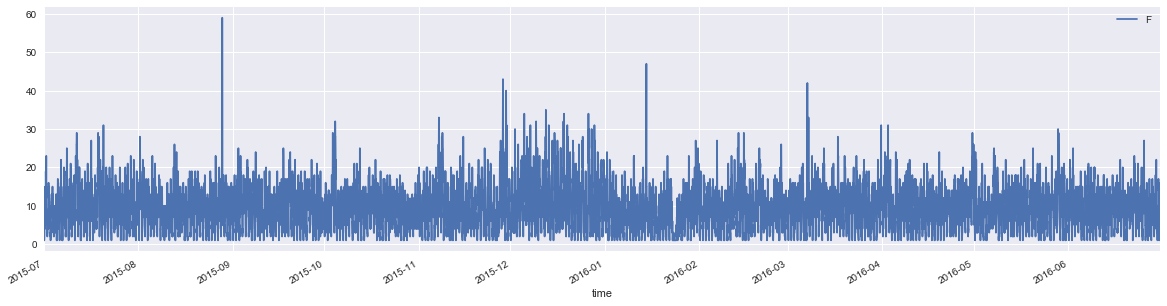

In [273]:
line_C.plot('time','count',label='C',figsize=(20,5))
line_1.plot('time','count',label='1',figsize=(20,5))
line_E.plot('time','count',label='E',figsize=(20,5))
line_6.plot('time','count',label='6',figsize=(20,5))
line_R.plot('time','count',label='R',figsize=(20,5))
line_F.plot('time','count',label='F',figsize=(20,5))

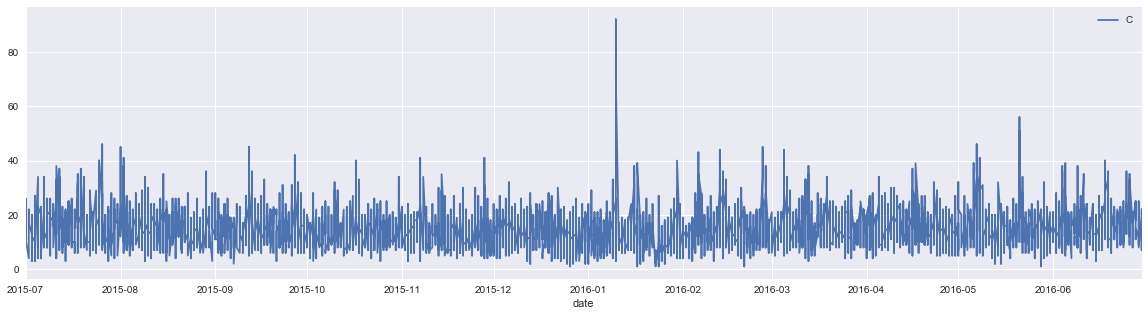

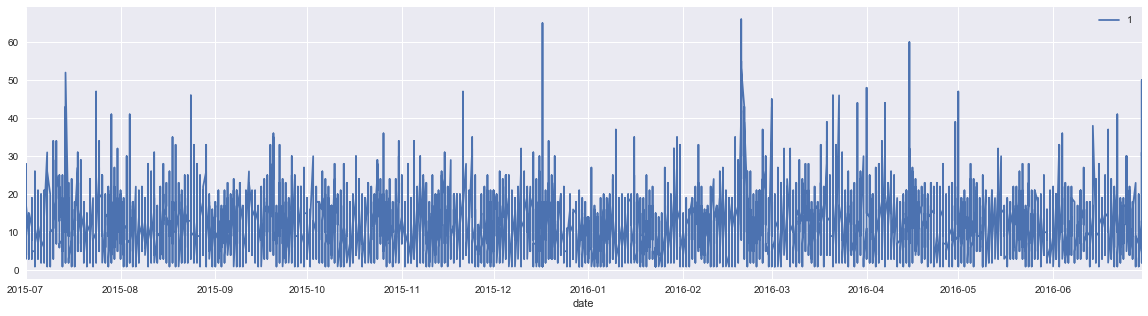

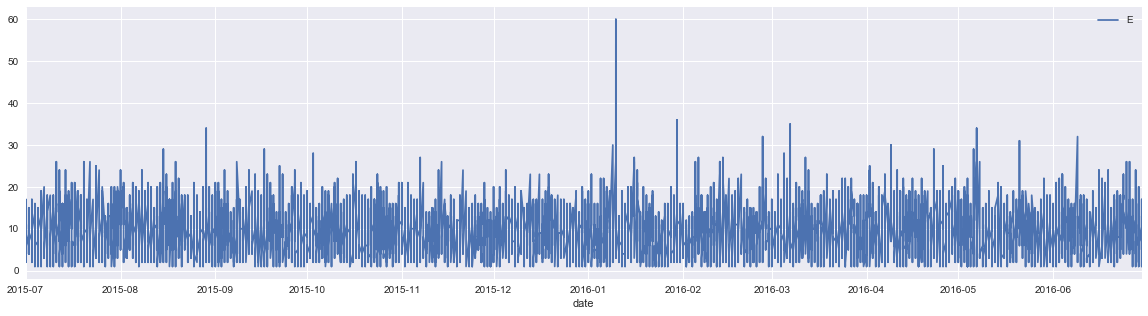

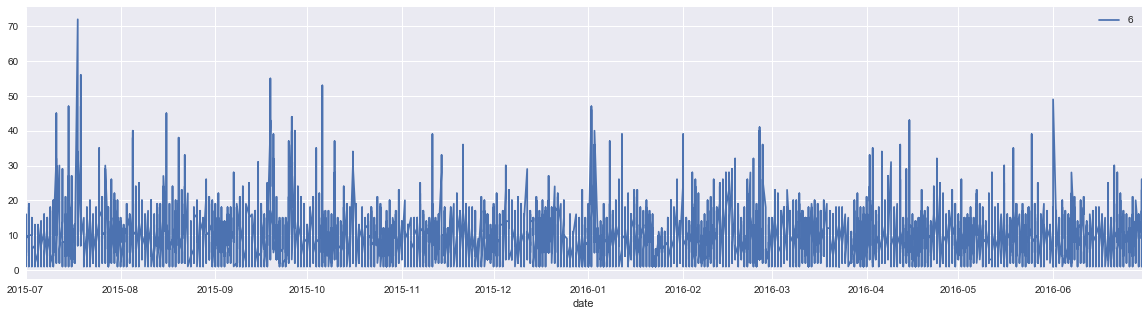

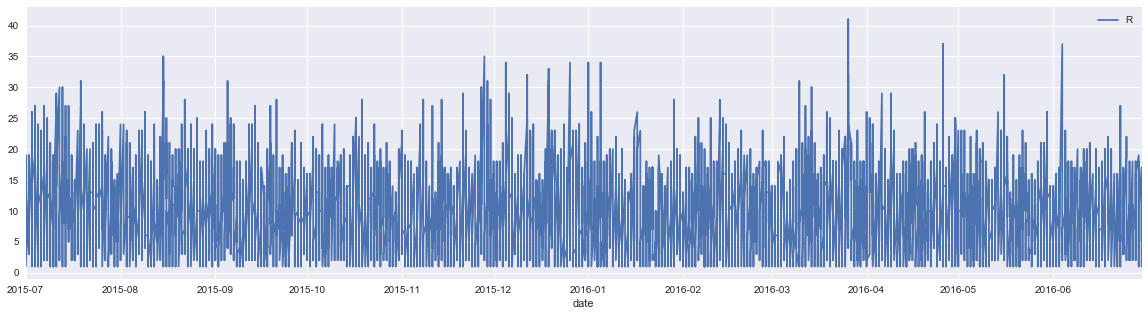

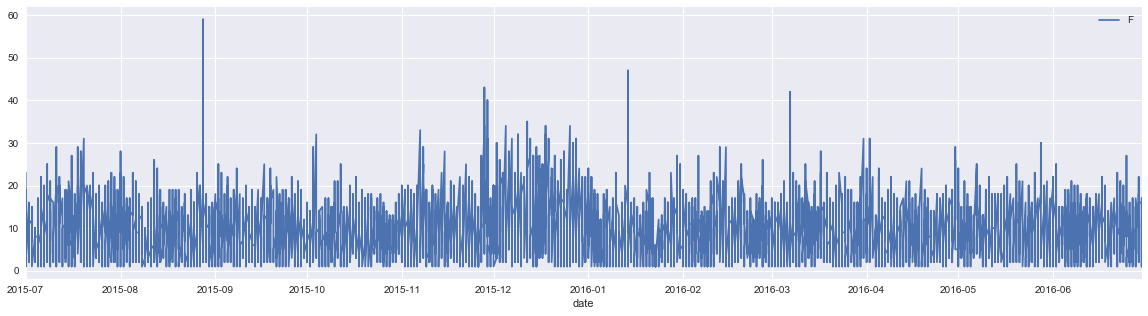

In [275]:
line_C.plot('date','count',label='C',figsize=(20,5))
line_1.plot('date','count',label='1',figsize=(20,5))
line_E.plot('date','count',label='E',figsize=(20,5))
line_6.plot('date','count',label='6',figsize=(20,5))
line_R.plot('date','count',label='R',figsize=(20,5))
line_F.plot('date','count',label='F',figsize=(20,5))

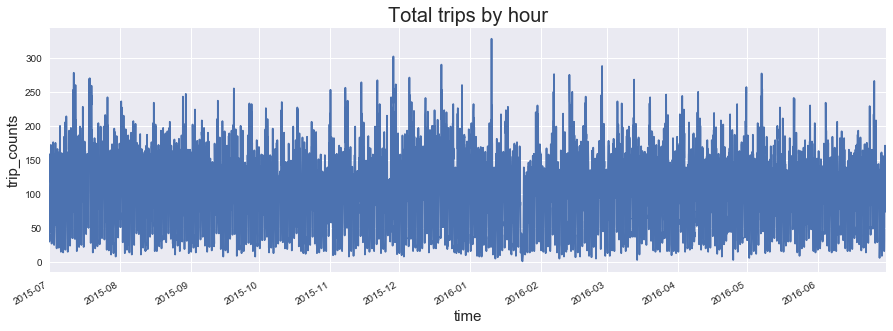

In [282]:
agg_time.plot(figsize=(15,5),legend=False)
plt.title('Total trips by hour',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('time',fontsize=15)

# ANORMALY DETECTION

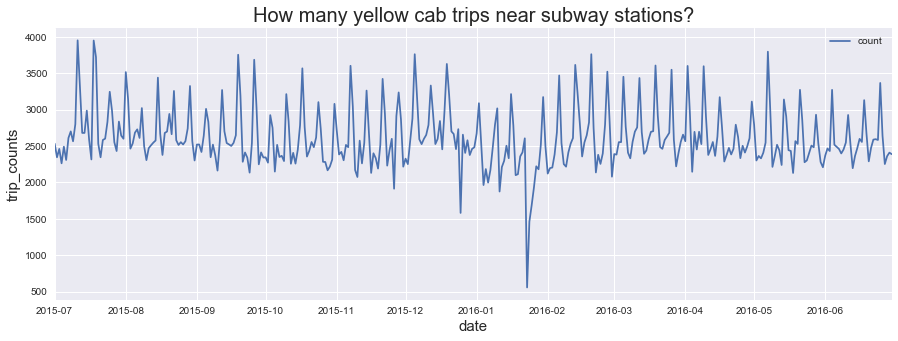

In [155]:
agg_date.plot(figsize=(15,5))
plt.title('How many yellow cab trips near subway stations?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

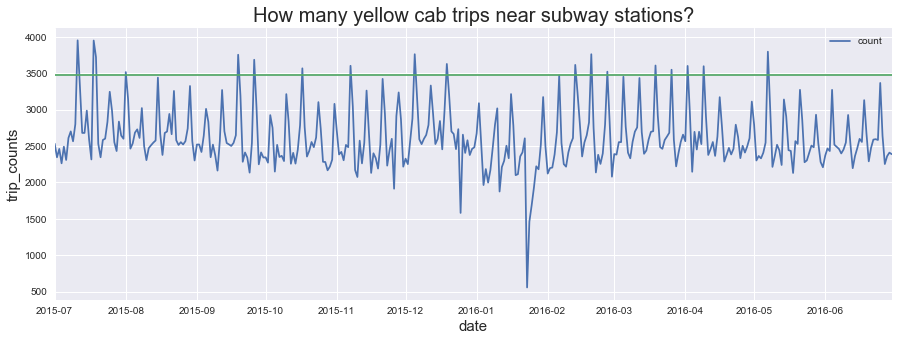

In [554]:
agg_date.plot(figsize=(15,5))
plt.plot([dt.date(2015,7,1),dt.date(2016,6,30)],[3471,3471])
plt.title('How many yellow cab trips near subway stations?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

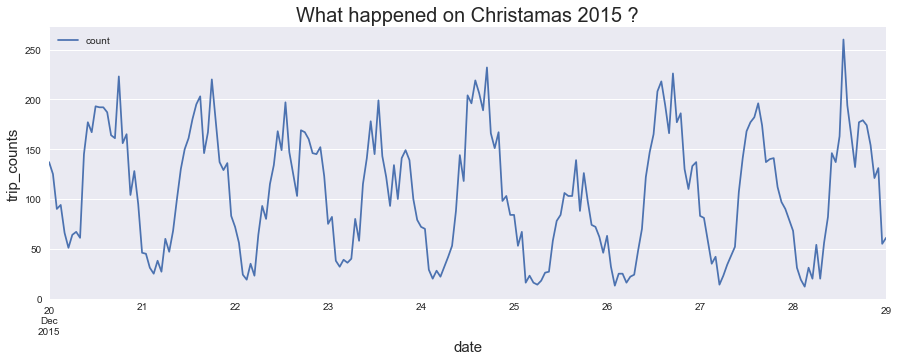

In [369]:
agg_time.loc['2015-12-20 00:00:00':'2015-12-29 00:00:00'].plot(figsize=(15,5))
plt.title('What happened on Christamas 2015 ?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

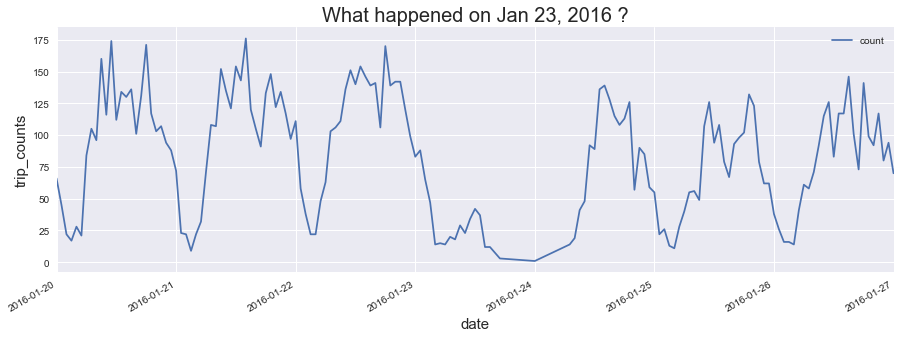

In [371]:
agg_time.loc['2016-01-20 00:00:00':'2016-01-27 00:00:00'].plot(figsize=(15,5))
plt.title('What happened on Jan 23, 2016 ?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

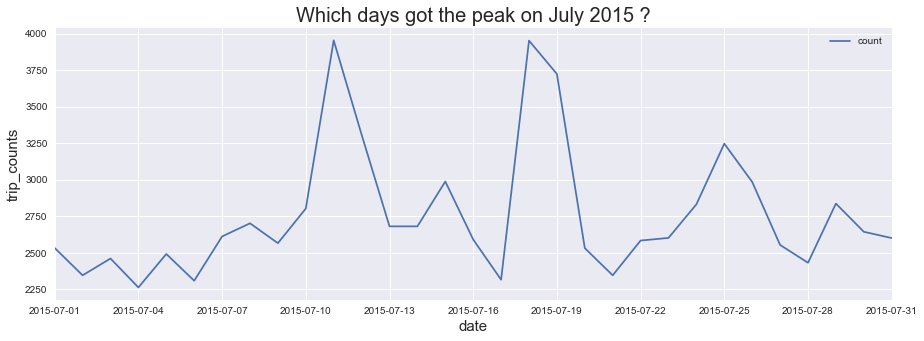

In [496]:
agg_date.loc[dt.date(2015,7,1):dt.date(2015,7,31)].plot(figsize=(15,5))
plt.title('Which days got the peak on July 2015 ?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

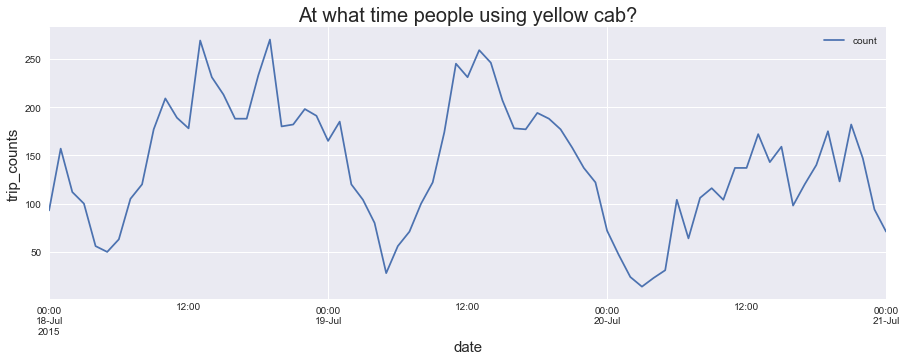

In [412]:
agg_time.loc['2015-07-18 00:00:00':'2015-07-21 00:00:00'].plot(figsize=(15,5))
plt.title('At what time people using yellow cab?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

In [430]:
date_without_outlier= agg_date[(agg_date.index!=dt.date(2016,1,23))&(agg_date.index!=dt.date(2016,1,24))&(agg_date.index!=dt.date(2015,12,25))]

In [438]:
import numpy as np

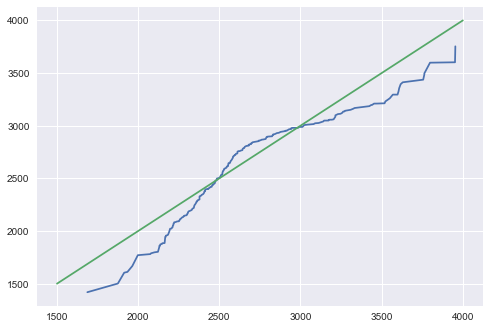

In [469]:
a=date_without_outlier.sort(columns=['count'])
b=np.random.normal(loc=a.mean(),scale=a.std(),size=len(a))
b=sorted(b)
plt.plot(a,b)
plt.plot([1500,4000],[1500,4000])

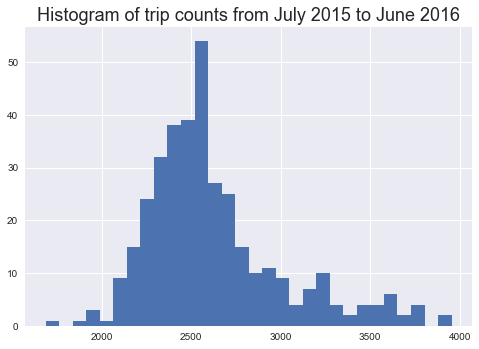

In [499]:
date_without_outlier.hist(bins=30)
plt.title('Histogram of trip counts from July 2015 to June 2016',fontsize=18)

#### The distribution of trip counts are not perfect normal distribution, but close to. So we just Z test

In [477]:
import scipy.stats as stats

In [502]:
stats.normaltest(date_without_outlier)

NormaltestResult(statistic=array([ 68.43831505]), pvalue=array([  1.37660300e-15]))

#### The null hypothesis is the date_without_outlier is from normal distribution.As P-value far less than 5%, we have to reject null hypo. So the data is not normal distributed. We use boxplot to identify outliers

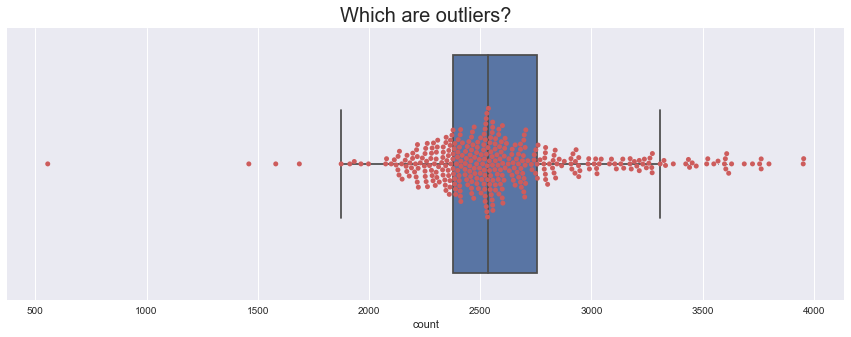

In [573]:
#sns.boxplot(agg_date['count'])

plt.figure(figsize=(15,5))
r = sns.boxplot(agg_date['count'],fliersize=1)
sns.swarmplot(agg_date['count'],color='indianred')
plt.title("Which are outliers?",fontsize=20)

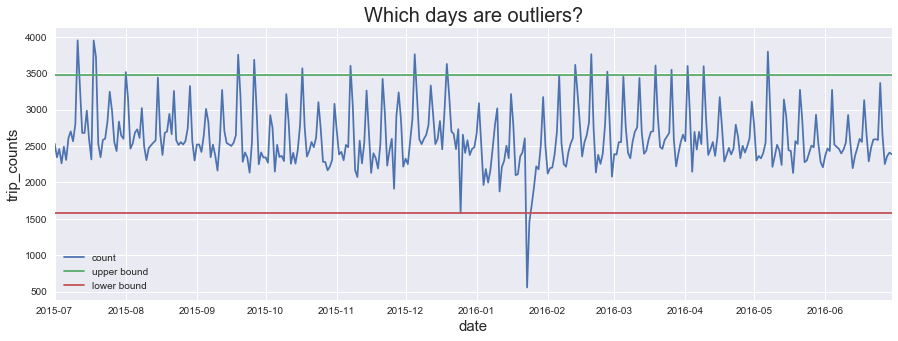

In [647]:
agg_date.plot(figsize=(15,5))
plt.plot([dt.date(2015,7,1),dt.date(2016,6,30)],[3471,3471],label='upper bound')

plt.plot([dt.date(2015,7,1),dt.date(2016,6,30)],[1581,1581],label='lower bound')
plt.title('Which days are outliers?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)
plt.legend()

In [593]:
top_points = r["fliers"][0].get_data()[1]
bottom_points = r["fliers"][2].get_data()[1]
plt.plot(np.ones(len(top_points)), top_points, "+")
plt.plot(np.ones(len(bottom_points)), bottom_points, "+")

IndexError: list index out of range

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


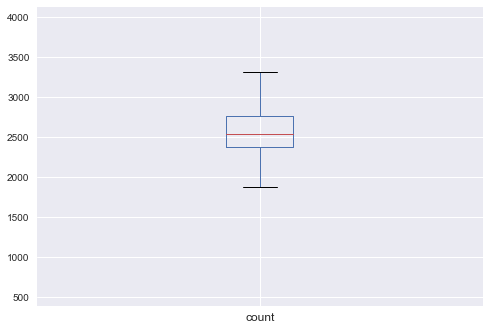

In [590]:
r=agg_date.boxplot()

In [592]:
r['fliers'][0].get_data()[1]

array([ 556, 1460, 1687, 1581, 3471, 3617, 3763, 3523, 3453, 3436, 3608,
       3550, 3602, 3598, 3798, 3368, 3954, 3952, 3724, 3518, 3441, 3326,
       3756, 3687, 3569, 3604, 3424, 3763, 3333, 3630])

## hourly anomaly

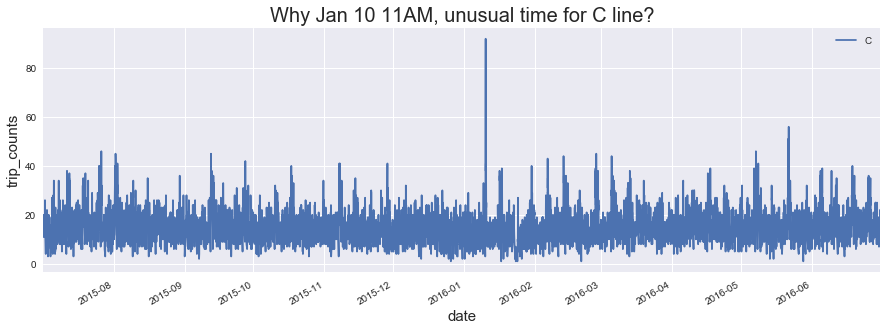

In [597]:
line_C.plot('time','count',label='C',figsize=(15,5))
plt.title('Why Jan 10 11AM, unusual time for C line?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

(735973.0, 735974.0)

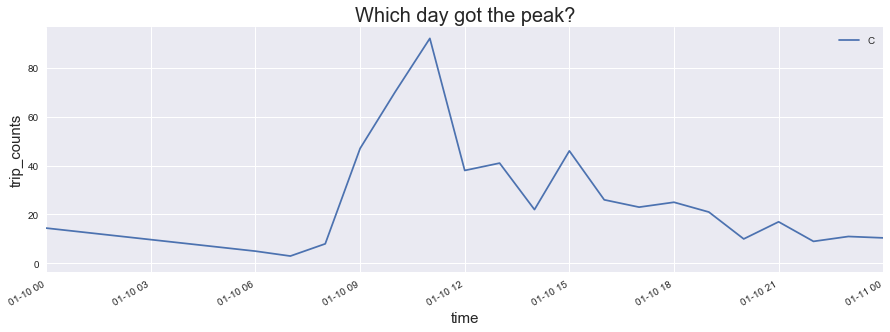

In [596]:
line_C.plot('time','count',label='C',figsize=(15,5))
plt.title('Which day got the peak?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.xlim('2016-01-10','2016-01-11')

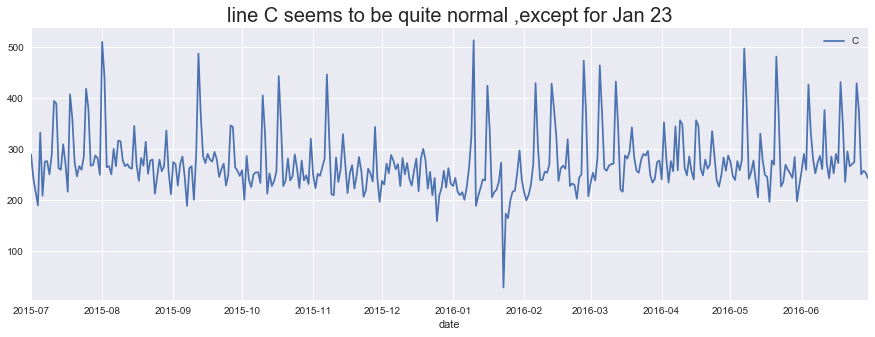

In [764]:
line_C.groupby('date').sum()['count'].plot(figsize=(15,5),label='C')
plt.legend()
plt.title('line C seems to be quite normal ,except for Jan 23', fontsize =20)

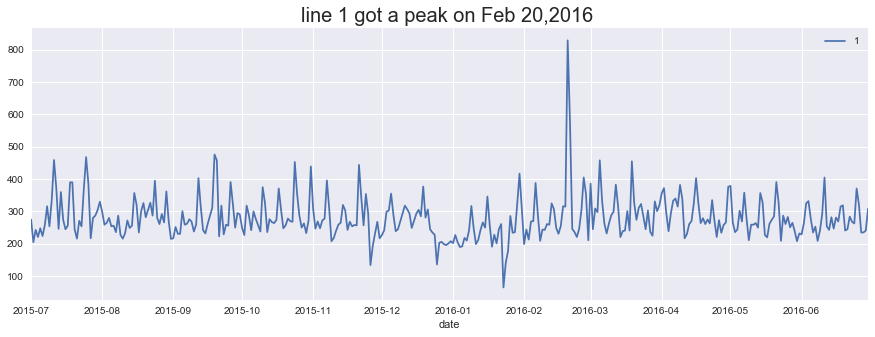

In [766]:
line_1.groupby('date').sum()['count'].plot(figsize=(15,5),label='1')
plt.legend()
plt.title('line 1 got a peak on Feb 20,2016 ', fontsize =20)

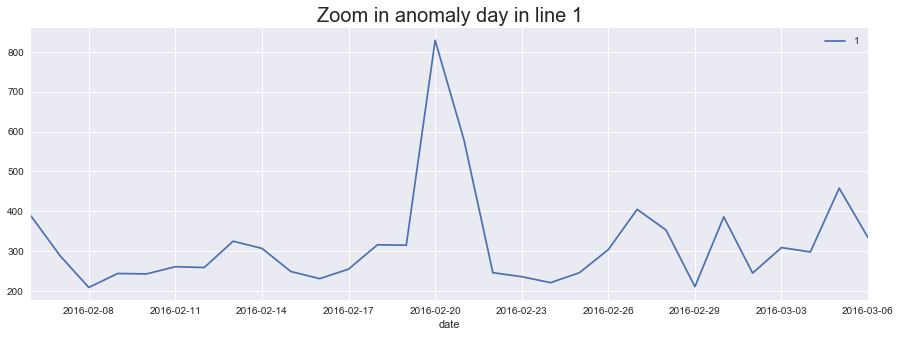

In [768]:
line_1.groupby('date').sum()['count'].iloc[220:250].plot(figsize=(15,5),label='1')
plt.title('Zoom in anomaly day in line 1', fontsize= 20)
plt.legend()

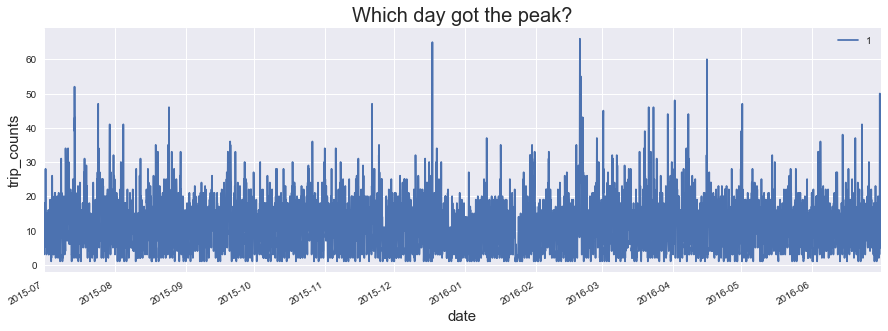

In [331]:
line_1.plot('time','count',label='1',figsize=(15,5))
plt.title('Which day got the peak?',fontsize=20)
plt.ylabel('trip_counts',fontsize=15)
plt.xlabel('date',fontsize=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a093990>]], dtype=object)

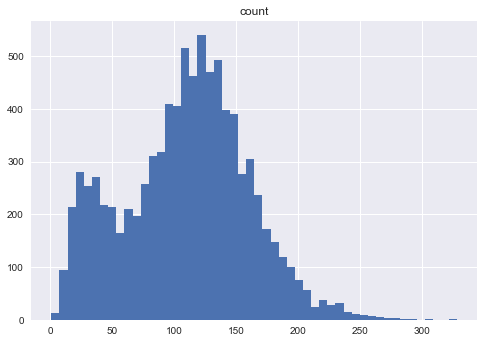

In [475]:
agg_time.hist(bins=50)  ## so it is not normal distribution

## Difference of Line C & Line 1 significant or not?

In [668]:
line_date={}
for i in line.keys():
    line_date[i] = line[i].groupby('date').sum()['count']

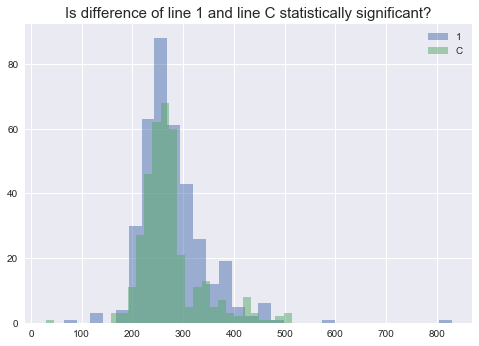

In [761]:
line_date['1'].hist(bins=30,label='1',alpha=0.5)
line_date['C'].hist(bins=30,label='C',alpha=0.5)
plt.legend()
plt.title('Is difference of line 1 and line C statistically significant?',fontsize=15)

In [737]:
from scipy.stats import ttest_ind

In [739]:
ttest_ind(line_date['1'],line_date['C'])

Ttest_indResult(statistic=1.4196982242185965, pvalue=0.15612243918524549)

In [755]:
ttest_ind(line_date['1'],line_date['R'])

Ttest_indResult(statistic=13.417832952540888, pvalue=7.5106669249630434e-37)

In [756]:
ttest_ind(line_date['C'],line_date['R'])

Ttest_indResult(statistic=12.682370251553181, pvalue=1.8822620961292071e-33)

## WHICH TWO LINES ARE SIMILIAR-PEARSONR

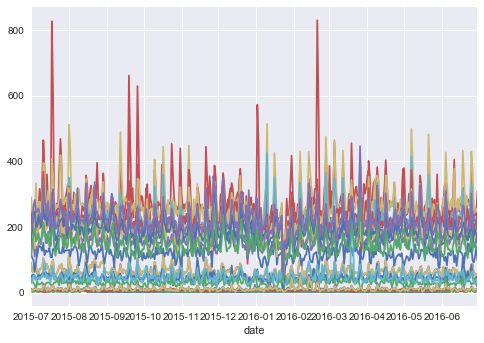

In [669]:
for i in line_date.keys():
    line_date[i].plot()

In [179]:
from scipy.stats import pearsonr

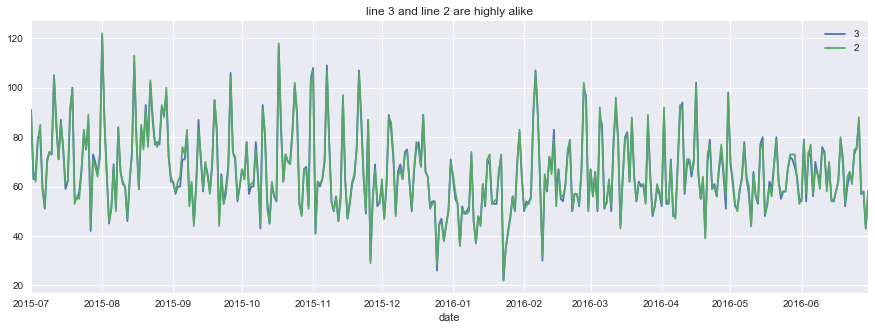

In [709]:
line_date['3'].plot(figsize=(15,5),label='3')
line_date['2'].plot(figsize=(15,5),label='2')
plt.legend()
plt.title('line 3 and line 2 are highly alike')

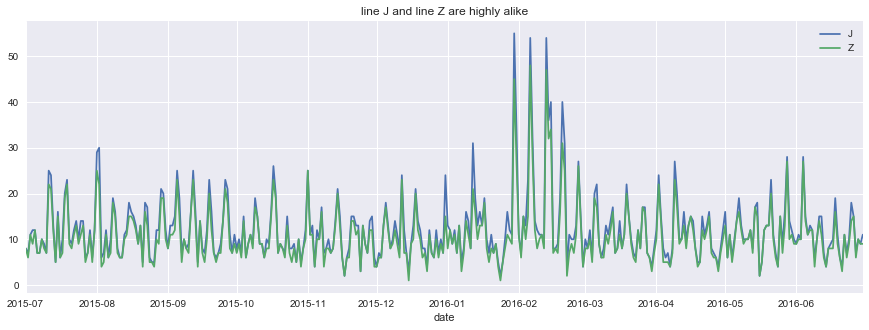

In [710]:
line_date['J'].plot(figsize=(15,5),label='J')
line_date['Z'].plot(figsize=(15,5),label='Z')
plt.legend()
plt.title('line J and line Z are highly alike')

In [717]:
### pvalue <0.5, coefficient >0.9, highly correlated
for i in range(len(line_date.keys())-1):
    for j in range(i+1,len(line_date.keys())):
        if line_date[line_date.keys()[i]].shape ==  line_date[line_date.keys()[j]].shape:
            if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[1]<0.05:
                if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[0]>0.9:
                    print line_date.keys()[i],line_date.keys()[j]
                    print pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])

3 2
(0.99478165505355631, 0.0)
5 4
(0.95275524942923584, 1.8717134904761059e-190)
F M
(0.93046519804418348, 8.3847736291151289e-161)
J Z
(0.98064806731420096, 6.7966140332516809e-260)
N Q
(0.96442783933250353, 2.0312504565698838e-212)
N R
(0.97045742889997733, 7.3592617055887541e-227)
Q R
(0.94346294007998954, 1.2352246004922893e-176)


In [711]:
### pvalue <0.5, coefficient <0.2, they are correlated but loose relationship
for i in range(len(line_date.keys())-1):
    for j in range(i+1,len(line_date.keys())):
        if line_date[line_date.keys()[i]].shape ==  line_date[line_date.keys()[j]].shape:
            if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[1]<0.05:
                if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[0]<0.2:
                    print line_date.keys()[i],line_date.keys()[j]
                    print pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])

7 A
(0.15252974534299835, 0.0034421394029200995)
7 E
(0.13226246633130298, 0.011315195585571328)
7 F
(0.16292593062181848, 0.0017647074630223959)
7 L
(0.15994350300425295, 0.0021462237701649874)
6 D
(0.11978985730068081, 0.021897850353586153)
A D
(0.14078974078525933, 0.0069819839193724182)
E D
(0.13106262596622714, 0.012085670512338019)


In [718]:
### pvalue >0.5 , they are not correlated
for i in range(len(line_date.keys())-1):
    for j in range(i+1,len(line_date.keys())):
        if line_date[line_date.keys()[i]].shape ==  line_date[line_date.keys()[j]].shape:
            if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[1]>0.05:
                #if pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])[0]<0.2:
                print line_date.keys()[i],line_date.keys()[j]
                print pearsonr(line_date[line_date.keys()[i]],line_date[line_date.keys()[j]])

1 7
(0.091094772442370658, 0.081788029379667934)
1 D
(0.058331991486424407, 0.2656709004130835)
3 7
(0.087019688040609097, 0.096463767530915775)
3 D
(0.074711014409810816, 0.15374978803452083)
2 7
(0.083838903156426267, 0.10931793568708548)
2 D
(0.071964303377776026, 0.16949429131151741)
7 6
(0.047576144068765376, 0.36409709389413014)
7 C
(0.088323022892904834, 0.091557650649198657)
7 J
(-0.043243631667501212, 0.40945370105073309)
7 N
(0.033391556365003072, 0.52424828356704234)
7 Q
(0.018677233740912149, 0.72174671396374301)
7 R
(0.052036237793147117, 0.32081754040090393)
7 Z
(-0.028320434301568956, 0.58915785005927734)
C D
(0.07837580532269732, 0.13449961532943577)
D J
(-0.02689495680528084, 0.60804676620478793)
D L
(0.023151018846880443, 0.65888782614922115)
D Z
(-0.017026588121510946, 0.74544817418753995)
